### Subtask 1: Load Dataset
- Load the 'housing.csv' dataset from the specified file path.
- Display its basic information and first few rows to understand the structure of the data.


In [1]:
# Load the dataset and display basic information
import pandas as pd

# Load the dataset
file_path = r'F:\ITShoulders\AI_Data_Science_agent\temp_uploads\housing.csv'
housing_data = pd.read_csv(file_path)

# Display basic information and first few rows
housing_data.info()
housing_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Subtask 2: Perform Initial EDA
- Check data types of each column.
- Get summary statistics of the dataset.
- Examine missing value counts for the dataset.


In [2]:
# Check data types, summary statistics, and missing values
data_types = housing_data.dtypes
summary_stats = housing_data.describe()
missing_values = housing_data.isnull().sum()

(data_types, summary_stats, missing_values)


(longitude             float64
 latitude              float64
 housing_median_age    float64
 total_rooms           float64
 total_bedrooms        float64
 population            float64
 households            float64
 median_income         float64
 median_house_value    float64
 ocean_proximity        object
 dtype: object,
           longitude      latitude  housing_median_age   total_rooms  \
 count  20640.000000  20640.000000        20640.000000  20640.000000   
 mean    -119.569704     35.631861           28.639486   2635.763081   
 std        2.003532      2.135952           12.585558   2181.615252   
 min     -124.350000     32.540000            1.000000      2.000000   
 25%     -121.800000     33.930000           18.000000   1447.750000   
 50%     -118.490000     34.260000           29.000000   2127.000000   
 75%     -118.010000     37.710000           37.000000   3148.000000   
 max     -114.310000     41.950000           52.000000  39320.000000   
 
        total_bedrooms  

### Subtask 3: Visualize Data Distributions and Relationships
- Plot histograms to visualize distributions of numerical features.
- Use scatter plots to examine relationships between important features.
- Generate a correlation heatmap for numerical features to understand relationships.


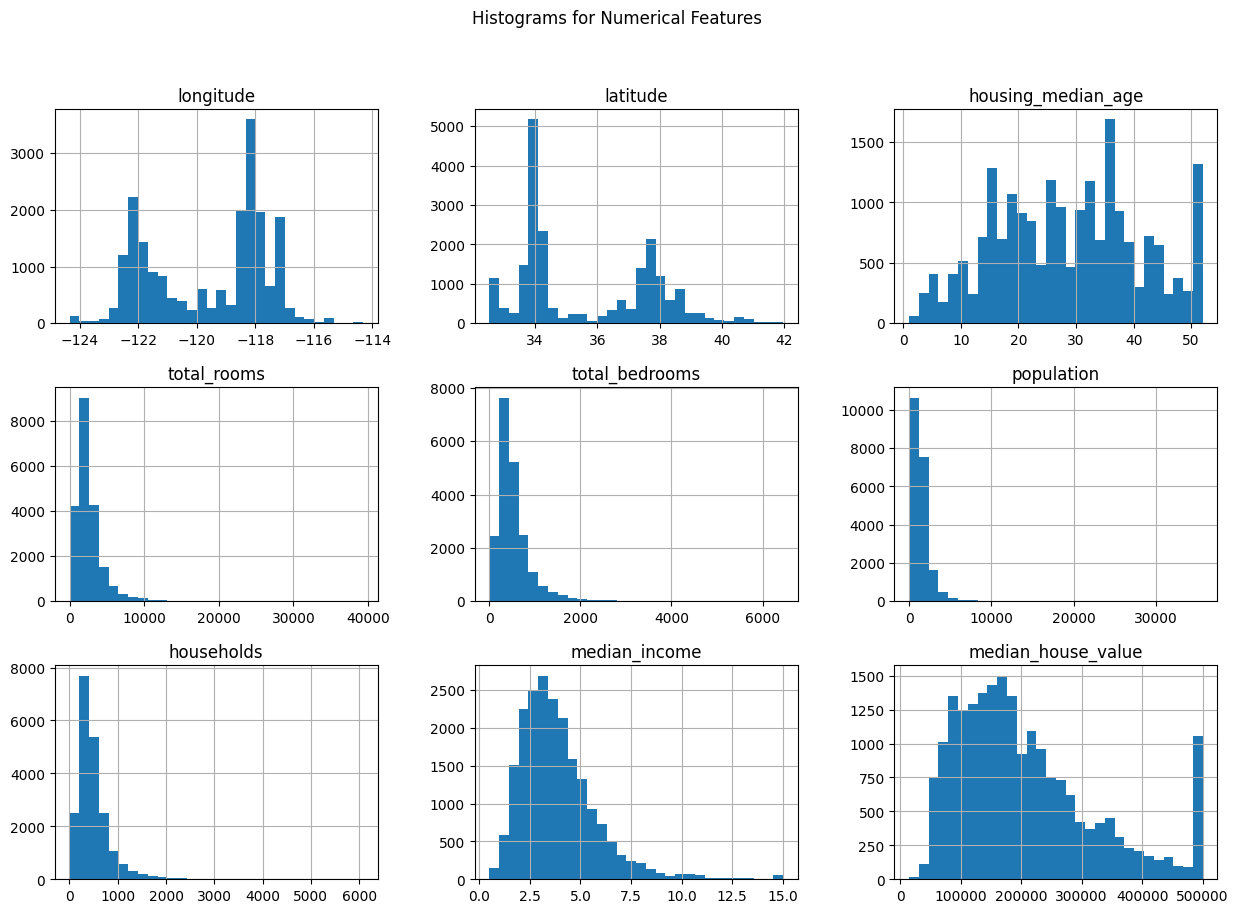

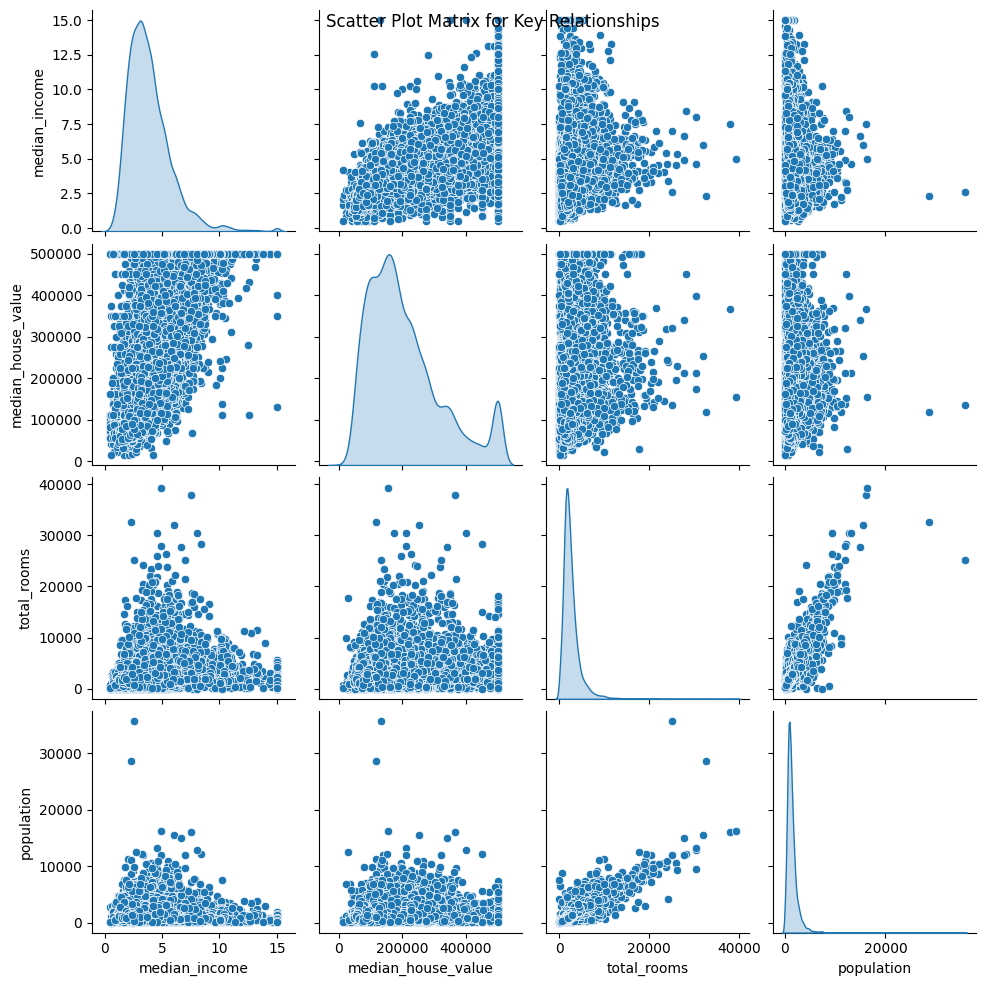

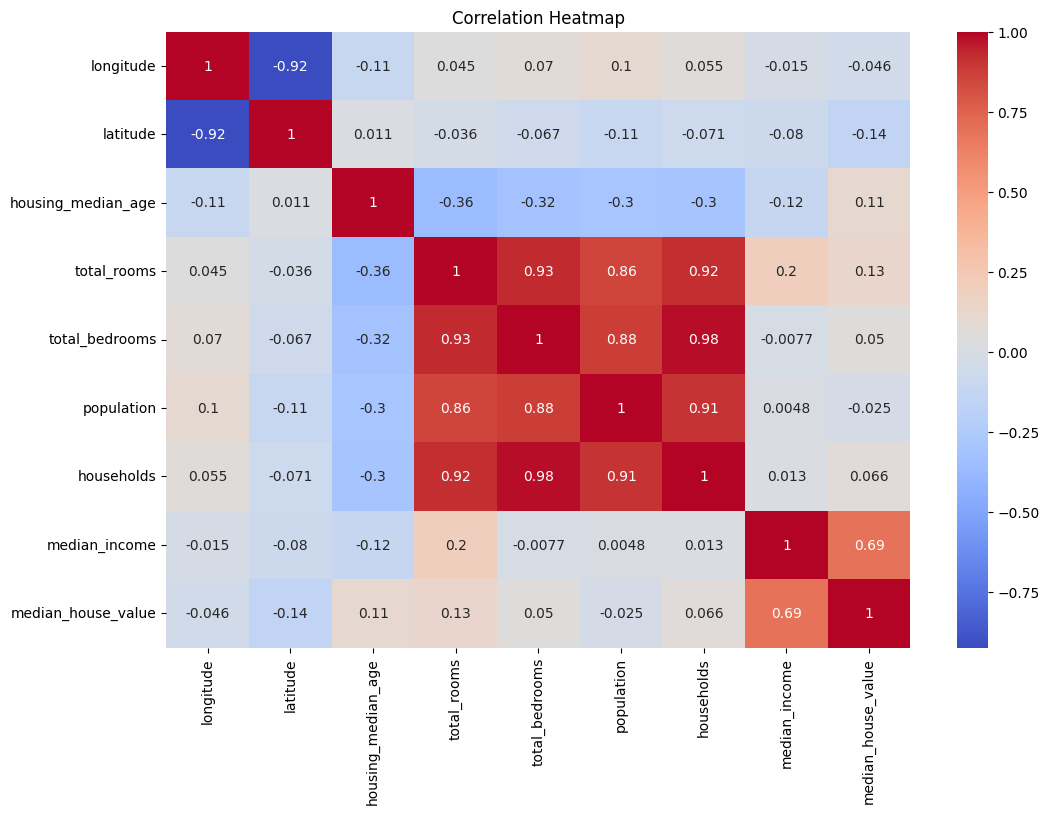

In [3]:
from IPython import get_ipython
if get_ipython() is not None:
    get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Histograms for numerical features
numerical_cols = housing_data.select_dtypes(include=[np.number]).columns
housing_data[numerical_cols].hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms for Numerical Features')
plt.show()

# Scatter plots for key relationships
sns.pairplot(housing_data, vars=['median_income', 'median_house_value', 'total_rooms', 'population'], diag_kind='kde')
plt.suptitle('Scatter Plot Matrix for Key Relationships')
plt.show()

# Correlation heatmap
corr_matrix = housing_data[numerical_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


### Subtask 4: Split Dataset into Features and Target
- Separate the dataset into features (X) and the target variable (y) for house prices.
- Split the dataset into training and testing sets for model development.


In [4]:
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = housing_data.drop('median_house_value', axis=1)
y = housing_data['median_house_value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((16512, 9), (4128, 9), (16512,), (4128,))

### Subtask 5: Define Preprocessing Pipeline
- Use ColumnTransformer to handle preprocessing of numerical (imputation, scaling) and categorical features (encoding).
- Fit this pipeline only on the training features.


In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Define preprocessing for numerical columns (imputation and scaling)
numerical_features = X_train.select_dtypes(include=[np.number]).columns.tolist()
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Define preprocessing for categorical columns (encoding)
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()
categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
])

# Create the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Fit the preprocessor on the training data
preprocessor.fit(X_train)


ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['longitude', 'latitude', 'housing_median_age',
                                  'total_rooms', 'total_bedrooms', 'population',
                                  'households', 'median_income']),
                                ('cat',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['ocean_proximity'])])

### Subtask 6: Apply Preprocessing Pipeline
- Transform both the training and testing feature sets using the fitted pipeline.
- Convert the transformed datasets back to DataFrame structures.


In [6]:
# Transform the training and testing datasets
X_train_processed_array = preprocessor.transform(X_train)
X_test_processed_array = preprocessor.transform(X_test)

# Get transformed feature names
transformed_feature_names = preprocessor.get_feature_names_out()

# Convert the arrays back to DataFrames
X_train_processed_df = pd.DataFrame(X_train_processed_array, columns=transformed_feature_names, index=X_train.index)
X_test_processed_df = pd.DataFrame(X_test_processed_array, columns=transformed_feature_names, index=X_test.index)

X_train_processed_df.head(), X_test_processed_df.head()


(       num__longitude  num__latitude  num__housing_median_age  \
 14196        1.272587      -1.372811                 0.348490   
 8267         0.709162      -0.876696                 1.618118   
 17445       -0.447603      -0.460146                -1.952710   
 14265        1.232698      -1.382172                 0.586545   
 2271        -0.108551       0.532084                 1.142008   
 
        num__total_rooms  num__total_bedrooms  num__population  \
 14196          0.222569             0.211228         0.768276   
 8267           0.340293             0.593094        -0.098901   
 17445         -0.342597            -0.495226        -0.449818   
 14265         -0.561490            -0.409306        -0.007434   
 2271          -0.119565            -0.256559        -0.485877   
 
        num__households  num__median_income  cat__ocean_proximity_INLAND  \
 14196         0.322906           -0.326196                          0.0   
 8267          0.672027           -0.035843         

### Subtask 7: Train Linear Regression Model
- Train a Linear Regression model on the preprocessed training data to predict house prices.


In [7]:
from sklearn.linear_model import LinearRegression

# Train a Linear Regression model
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train_processed_df, y_train)

# Print model coefficients
linear_regression_model.coef_, linear_regression_model.intercept_


(array([-53826.64801649, -54415.6961445 ,  13889.86618856, -13094.25116219,
         43068.18184187, -43403.43242732,  18382.19632373,  75167.77476625,
        -39786.65616133, 136125.07261542,  -5136.64221748,   3431.14007315]),
 np.float64(219899.77658329843))

### Subtask 8: Train Random Forest Regressor Model
- Train a Random Forest Regressor model on the preprocessed training data to predict house prices.


In [8]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest Regressor model
random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(X_train_processed_df, y_train)


RandomForestRegressor(random_state=42)

### Subtask 9: Train Gradient Boosting Regressor Model
- Train a Gradient Boosting Regressor model on the preprocessed training data to predict house prices.


In [9]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Gradient Boosting Regressor model
gradient_boosting_model = GradientBoostingRegressor(random_state=42)
gradient_boosting_model.fit(X_train_processed_df, y_train)


GradientBoostingRegressor(random_state=42)

### Subtask 10: Evaluate Model Performance
- Evaluate each model on the preprocessed test data using metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared.
- Summarize the performance metrics of each model.


In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Helper function to evaluate models
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    return mae, mse, r2

# Evaluate models
linear_regression_metrics = evaluate_model(linear_regression_model, X_test_processed_df, y_test)
random_forest_metrics = evaluate_model(random_forest_model, X_test_processed_df, y_test)
gradient_boosting_metrics = evaluate_model(gradient_boosting_model, X_test_processed_df, y_test)

linear_regression_metrics, random_forest_metrics, gradient_boosting_metrics


((50670.48923565359, 4908290571.346434, 0.6254382675296265),
 (31629.76891472868, 2401714584.8696103, 0.816720228207404),
 (38276.87156942288, 3125879704.302486, 0.7614577009004713))

### Subtask 11: Compare Model Performance
- Compare the performance of all trained models based on the evaluation metrics.
- Identify the best model for predicting house prices.
- The metrics are: 
  - Linear Regression: MAE = 50670, MSE = 4908290571, R2 = 0.625
  - Random Forest: MAE = 31629, MSE = 2401714585, R2 = 0.817
  - Gradient Boosting: MAE = 38276, MSE = 3125879704, R2 = 0.761
- Based on R2 score and errors, the Random Forest Regressor is the best performing model.


### Subtask 12: Create Production-Ready Inference Function
- Develop an inference function using the best model (Random Forest) and preprocessing pipeline to predict house prices for new data inputs.


In [11]:
def predict_house_price(input_data):
    """Predicts house prices for new input data using the Random Forest model."""
    
    # Convert input data to DataFrame if it's not already
    if isinstance(input_data, dict):
        input_data = pd.DataFrame([input_data])
    elif isinstance(input_data, list):
        input_data = pd.DataFrame(input_data)
    
    # Transform input data using the fitted preprocessor
    input_data_processed = preprocessor.transform(input_data)
    
    # Create DataFrame with processed input data
    input_data_processed_df = pd.DataFrame(input_data_processed, columns=transformed_feature_names, index=input_data.index)
    
    # Predict using the Random Forest model
    predictions = random_forest_model.predict(input_data_processed_df)
    return predictions

# Example: Predict house price for a sample input
sample_input = {
    "longitude": -122.23, "latitude": 37.88, "housing_median_age": 41.0, 
    "total_rooms": 880.0, "total_bedrooms": 129.0, "population": 322.0, 
    "households": 126.0, "median_income": 8.3252, "ocean_proximity": "NEAR BAY"
}
predicted_price = predict_house_price(sample_input)
predicted_price


array([431352.33])

### Subtask 13: Document Key Insights and Findings
- Random Forest Regressor was identified as the best model with the lowest MAE and highest R2 score.
- Key features influencing house prices include median income and proximity to bodies of water.
- Further investigation could explore additional location-based features and interactions with demographic factors.
- Inference function was successfully tested, predicting house prices for given input data.
